# Regression MLP

In [2]:
import keras.models
import matplotlib.pyplot as plt
import numpy as np
import tensorflow  as tf
import pandas as pd
from tensorflow import keras
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [3]:
np.random.seed(42)
tf.random.set_seed(42)

In [4]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
    ])

model.compile(loss ='mean_squared_error', optimizer='sgd', metrics=['accuracy'])
history = model.fit(X_train,y_train, epochs=20, validation_data=(X_valid,y_valid))
mse_test = model.evaluate(X_test,y_test)
X_new = X_test[:4]
value = model.predict(X_new)
print(value)

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 0.7876 - accuracy: 0.0028 - val_loss: 0.9010 - val_accuracy: 0.0044
Epoch 2/20
363/363 [==============================] - 0s 848us/step - loss: 0.4822 - accuracy: 0.0028 - val_loss: 0.8625 - val_accuracy: 0.0044
Epoch 3/20
363/363 [==============================] - 0s 859us/step - loss: 0.4312 - accuracy: 0.0028 - val_loss: 0.4696 - val_accuracy: 0.0044
Epoch 4/20
363/363 [==============================] - 0s 869us/step - loss: 0.3992 - accuracy: 0.0028 - val_loss: 0.3706 - val_accuracy: 0.0044
Epoch 5/20
363/363 [==============================] - 0s 864us/step - loss: 0.3923 - accuracy: 0.0028 - val_loss: 0.9961 - val_accuracy: 0.0044
Epoch 6/20
363/363 [==============================] - 0s 866us/step - loss: 0.3902 - accuracy: 0.0028 - val_loss: 0.9946 - val_accuracy: 0.0044
Epoch 7/20
363/363 [==============================] - 0s 841us/step - loss: 0.4533 - accuracy: 0.0029 - val_loss: 12.2535 - val_accuracy: 

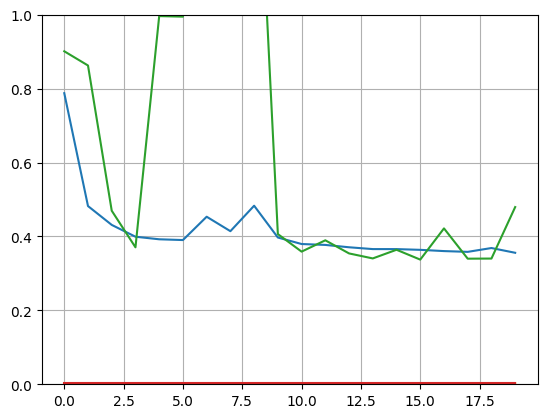

In [5]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# Functional API

In [6]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [7]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 8)]                  0         []                            
                                                                                                  
 dense_2 (Dense)             (None, 30)                   270       ['input_1[0][0]']             
                                                                                                  
 dense_3 (Dense)             (None, 30)                   930       ['dense_2[0][0]']             
                                                                                                  
 concatenate (Concatenate)   (None, 38)                   0         ['input_1[0][0]',             
                                                                     'dense_3[0][0]']         

In [8]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.9832 - val_loss: 1.5853
Epoch 2/20
363/363 [==============================] - 0s 871us/step - loss: 0.7180 - val_loss: 0.6595
Epoch 3/20
363/363 [==============================] - 0s 892us/step - loss: 0.6558 - val_loss: 0.6551
Epoch 4/20
363/363 [==============================] - 0s 901us/step - loss: 0.6235 - val_loss: 0.5932
Epoch 5/20
363/363 [==============================] - 0s 901us/step - loss: 0.5968 - val_loss: 0.5738
Epoch 6/20
363/363 [==============================] - 0s 854us/step - loss: 0.5745 - val_loss: 0.5580
Epoch 7/20
363/363 [==============================] - 0s 917us/step - loss: 0.5570 - val_loss: 0.5261
Epoch 8/20
363/363 [==============================] - 0s 896us/step - loss: 0.5413 - val_loss: 0.5270
Epoch 9/20
363/363 [==============================] - 0s 830us/step - loss: 0.5263 - val_loss: 0.5023
Epoch 10/20
363/363 [==============================] - 0s 853us/step - loss: 0.5136 

In [9]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [10]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 2.0031 - val_loss: 1.5631
Epoch 2/20
363/363 [==============================] - 0s 898us/step - loss: 0.7109 - val_loss: 0.7300
Epoch 3/20
363/363 [==============================] - 0s 929us/step - loss: 0.6103 - val_loss: 0.5652
Epoch 4/20
363/363 [==============================] - 0s 884us/step - loss: 0.5547 - val_loss: 0.5186
Epoch 5/20
363/363 [==============================] - 0s 924us/step - loss: 0.5158 - val_loss: 0.4845
Epoch 6/20
363/363 [==============================] - 0s 882us/step - loss: 0.4875 - val_loss: 0.4598
Epoch 7/20
363/363 [==============================] - 0s 901us/step - loss: 0.4654 - val_loss: 0.4431
Epoch 8/20
363/363 [==============================] - 0s 905us/step - loss: 0.4517 - val_loss: 0.4324
Epoch 9/20
363/363 [==============================] - 0s 868us/step - loss: 0.4432 - val_loss: 0.4293
Epoch 10/20
363/363 [==============================] - 0s 867us/step - loss: 0.4379 

In [11]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [12]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3), metrics=['accuracy'])

In [13]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 2.5434 - main_output_loss: 2.2991 - aux_output_loss: 4.7425 - main_output_accuracy: 0.0028 - aux_output_accuracy: 0.0013 - val_loss: 1.5818 - val_main_output_loss: 1.3162 - val_aux_output_loss: 3.9721 - val_main_output_accuracy: 0.0044 - val_aux_output_accuracy: 0.0026
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 1.0391 - main_output_loss: 0.8111 - aux_output_loss: 3.0905 - main_output_accuracy: 0.0029 - aux_output_accuracy: 0.0025 - val_loss: 1.0292 - val_main_output_loss: 0.7122 - val_aux_output_loss: 3.8821 - val_main_output_accuracy: 0.0044 - val_aux_output_accuracy: 0.0044
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.8154 - main_output_loss: 0.6583 - aux_output_loss: 2.2290 - main_output_accuracy: 0.0028 - aux_output_accuracy: 0.0029 - val_loss: 0.9953 - val_main_output_loss: 0.6601 - val_aux_output_loss: 4.0121 - val_main_output_accuracy: 0.0044 - 

# The subclassing API

In [14]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

In [15]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 2.9400 - output_1_loss: 2.7196 - output_2_loss: 4.9237 - val_loss: 1.9503 - val_output_1_loss: 1.5651 - val_output_2_loss: 5.4173
Epoch 2/10
363/363 [==============================] - 0s 962us/step - loss: 1.1766 - output_1_loss: 0.9478 - output_2_loss: 3.2363 - val_loss: 1.3297 - val_output_1_loss: 0.8789 - val_output_2_loss: 5.3871
Epoch 3/10
363/363 [==============================] - 0s 976us/step - loss: 0.8980 - output_1_loss: 0.7434 - output_2_loss: 2.2892 - val_loss: 1.1166 - val_output_1_loss: 0.6710 - val_output_2_loss: 5.1274
Epoch 4/10
363/363 [==============================] - 0s 964us/step - loss: 0.7881 - output_1_loss: 0.6711 - output_2_loss: 1.8413 - val_loss: 1.0340 - val_output_1_loss: 0.6287 - val_output_2_loss: 4.6810
Epoch 5/10
363/363 [==============================] - 0s 978us/step - loss: 0.7312 - output_1_loss: 0.6333 - output_2_loss: 1.6120 - val_loss: 0.9613 - val_output_1_loss: 0.6104 

# Saving and Restoring

In [16]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [17]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 990us/step - loss: 1.9720 - val_loss: 0.7818
Epoch 2/10
363/363 [==============================] - 0s 818us/step - loss: 0.7458 - val_loss: 0.7713
Epoch 3/10
363/363 [==============================] - 0s 806us/step - loss: 0.6768 - val_loss: 0.6017
Epoch 4/10
363/363 [==============================] - 0s 841us/step - loss: 0.6234 - val_loss: 0.5748
Epoch 5/10
363/363 [==============================] - 0s 847us/step - loss: 0.5823 - val_loss: 0.5341
Epoch 6/10
363/363 [==============================] - 0s 820us/step - loss: 0.5465 - val_loss: 0.4974
Epoch 7/10
363/363 [==============================] - 0s 825us/step - loss: 0.5174 - val_loss: 0.4695
Epoch 8/10
363/363 [==============================] - 0s 816us/step - loss: 0.4928 - val_loss: 0.4651
Epoch 9/10
363/363 [==============================] - 0s 819us/step - loss: 0.4727 - val_loss: 0.4469
Epoch 10/10
162/162 [==============================] - 0s 572us/step - loss: 0.439

In [18]:
model.save("my_keras_model.keras")

In [19]:
model = keras.models.load_model("my_keras_model.h5")

In [20]:
model.predict(X_new)

1/1 [==============================] - 0s 32ms/step


array([[0.8855833],
       [1.3628354],
       [3.1775024],
       [2.3753927]], dtype=float32)

In [21]:
model.save_weights("my_keras_weights.ckpt")

In [22]:
model.load_weights("my_keras_weights.ckpt")
#model.weights

# Using Callbacks during Training

In [23]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [25]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.keras") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4585 - val_loss: 0.4444
Epoch 2/10
363/363 [==============================] - 0s 897us/step - loss: 0.4481 - val_loss: 0.4470
Epoch 3/10
363/363 [==============================] - 0s 864us/step - loss: 0.4396 - val_loss: 0.4318
Epoch 4/10
363/363 [==============================] - 0s 881us/step - loss: 0.4320 - val_loss: 0.4503
Epoch 5/10
363/363 [==============================] - 0s 910us/step - loss: 0.4263 - val_loss: 0.4289
Epoch 6/10
363/363 [==============================] - 0s 849us/step - loss: 0.4210 - val_loss: 0.4438
Epoch 7/10
363/363 [==============================] - 0s 867us/step - loss: 0.4167 - val_loss: 0.4494
Epoch 8/10
363/363 [==============================] - 0s 907us/step - loss: 0.4127 - val_loss: 0.4139
Epoch 9/10
363/363 [==============================] - 0s 861us/step - loss: 0.4091 - val_loss: 0.4270
Epoch 10/10
162/162 [==============================] - 0s 588us/step - loss: 0.4398


In [26]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4436 - val_loss: 0.4343
Epoch 2/100
363/363 [==============================] - 0s 839us/step - loss: 0.4330 - val_loss: 0.4675
Epoch 3/100
363/363 [==============================] - 0s 910us/step - loss: 0.4246 - val_loss: 0.4557
Epoch 4/100
363/363 [==============================] - 0s 880us/step - loss: 0.4172 - val_loss: 0.4391
Epoch 5/100
363/363 [==============================] - 0s 858us/step - loss: 0.4117 - val_loss: 0.4029
Epoch 6/100
363/363 [==============================] - 0s 802us/step - loss: 0.4062 - val_loss: 0.4634
Epoch 7/100
363/363 [==============================] - 0s 819us/step - loss: 0.4025 - val_loss: 0.4161
Epoch 8/100
363/363 [==============================] - 0s 846us/step - loss: 0.3985 - val_loss: 0.3844
Epoch 9/100
363/363 [==============================] - 0s 811us/step - loss: 0.3952 - val_loss: 0.4165
Epoch 10/100
363/363 [==============================] - 0s 828us/step - los

# TensorBoard

In [27]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'.\\my_logs\\run_2024_01_21-11_50_02'

In [28]:
odel = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [29]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 1ms/step - loss: 0.3869 - val_loss: 0.4079
Epoch 2/30
363/363 [==============================] - 0s 908us/step - loss: 0.3843 - val_loss: 0.4947
Epoch 3/30
363/363 [==============================] - 0s 915us/step - loss: 0.3828 - val_loss: 0.4165
Epoch 4/30
363/363 [==============================] - 0s 899us/step - loss: 0.3803 - val_loss: 0.3960
Epoch 5/30
363/363 [==============================] - 0s 901us/step - loss: 0.3787 - val_loss: 0.3847
Epoch 6/30
363/363 [==============================] - 0s 911us/step - loss: 0.3767 - val_loss: 0.4658
Epoch 7/30
363/363 [==============================] - 0s 893us/step - loss: 0.3756 - val_loss: 0.4079
Epoch 8/30
363/363 [==============================] - 0s 900us/step - loss: 0.3739 - val_loss: 0.3822
Epoch 9/30
363/363 [==============================] - 0s 907us/step - loss: 0.3725 - val_loss: 0.4118
Epoch 10/30
363/363 [==============================] - 0s 897us/step - loss: 0.3710 